<a href="https://colab.research.google.com/github/cristiancarcamo-netizen/Portafolio/blob/main/World_bank.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Uso de la api del banco mundial

La versión 1.0.12 del  paquete wbgapi de Python  ya está disponible. Este paquete lleva casi un año en el  Índice de Paquetes de Python  y la última versión incorpora varias funciones nuevas para que la exploración y la búsqueda en bases de datos sean más sencillas e interactivas.

Los paquetes de Python para datos del Banco Mundial existen desde hace tiempo, pero WBGAPI es relativamente nuevo. Este paquete aprovecha algunas mejoras de la API que también existen desde hace tiempo, pero que eran difíciles de entender o usar, y no contaban con el soporte de otros paquetes. También quería mejorar  la compatibilidad con Pandas  y, en general, facilitar la recuperación de datos sin necesidad de código adicional.

In [1]:
#Instalar biblioteca
%pip install wbgapi

In [2]:
import wbgapi as wb
import wbgapi as wb
import pandas as pd
import numpy as np
from math import ceil


In [3]:
from google.colab import drive
from datetime import datetime
drive.mount('/content/drive')

import sys
sys.path.append('/content/drive/MyDrive/CYD economia examen')

import my_func as fn

Mounted at /content/drive


Usando la api del banco mundial es posible acceder a estadisticas diversas sobre el desarrollo economico. a contiuacion extraeremos informacion de 65 indicadores economicos

In [4]:
# Indicadores a consultar
dicc_indicadores = {
    "NY.GDP.MKTP.PP.KD": "GDP, PPP (constant 2021 international $)",
    "SP.POP.GROW": "Population growth (annual %)",
    "SP.POP.TOTL": "Population, total",
    "SP.POP.TOTL.FE.IN": "Population, female",
    "SP.POP.TOTL.FE.ZS": "Population, female (% of total population)",
    "SP.POP.TOTL.MA.IN": "Population, male",
    "SP.POP.TOTL.MA.ZS": "Population, male (% of total population)",
    "SP.URB.GROW": "Urban population growth (annual %)",
    "SP.URB.TOTL": "Urban population",
    "SP.URB.TOTL.IN.ZS": "Urban population (% of total population)",
    "SP.RUR.TOTL": "Rural population",
    "SP.RUR.TOTL.ZG": "Rural population growth (annual %)",
    "SP.RUR.TOTL.ZS": "Rural population (% of total population)",
    "SL.TLF.TOTL.IN": "Labor force, total",
    "SL.TLF.TOTL.FE.ZS": "Labor force, female (% of total labor force)",
    "SL.UEM.TOTL.FE.NE.ZS": "Unemployment, female (% of female labor force) (national estimate)",
    "SL.UEM.TOTL.FE.ZS": "Unemployment, female (% of female labor force) (modeled ILO estimate)",
    "SL.UEM.TOTL.MA.NE.ZS": "Unemployment, male (% of male labor force) (national estimate)",
    "SL.UEM.TOTL.MA.ZS": "Unemployment, male (% of male labor force) (modeled ILO estimate)",
    "SL.UEM.TOTL.NE.ZS": "Unemployment, total (% of total labor force) (national estimate)",
    "SL.UEM.TOTL.ZS": "Unemployment, total (% of total labor force) (modeled ILO estimate)",
    "FP.CPI.TOTL.ZG": "Inflation, consumer prices (annual %)",
    "GC.TAX.EXPT.CN": "Taxes on exports (current LCU)",
    "GC.TAX.EXPT.ZS": "Taxes on exports (% of tax revenue)",
    "NE.EXP.GNFS.KD.ZG": "Exports of goods and services (annual % growth)",
    "NE.EXP.GNFS.KN": "Exports of goods and services (constant LCU)",
    "NE.EXP.GNFS.ZS": "Exports of goods and services (% of GDP)",
    "NV.AGR.TOTL.CD": "Agriculture, forestry, and fishing, value added (current US$)",
    "NV.AGR.TOTL.CN": "Agriculture, forestry, and fishing, value added (current LCU)",
    "NV.IND.MANF.CD": "Manufacturing, value added (current US$)",
    "NV.IND.MANF.CN": "Manufacturing, value added (current LCU)",
    "NV.IND.TOTL.CD": "Industry (including construction), value added (current US$)",
    "NV.IND.TOTL.CN": "Industry (including construction), value added (current LCU)",
    "NV.SRV.TOTL.CD": "Services, value added (current US$)",
    "NV.SRV.TOTL.CN": "Services, value added (current LCU)",
    "GE.EST": "Government Effectiveness: Estimate",
    "NE.CON.GOVT.KN": "General government final consumption expenditure (constant LCU)",
    "NE.CON.GOVT.ZS": "General government final consumption expenditure (% of GDP)",
    "NE.CON.PRVT.CD": "Households and NPISHs Final consumption expenditure (current US$)",
    "NE.CON.PRVT.CN": "Households and NPISHs Final consumption expenditure (current LCU)",
    "GC.DOD.TOTL.CN": "Central government debt, total (current LCU)",
    "GC.DOD.TOTL.GD.ZS": "Central government debt, total (% of GDP)",
    "BM.KLT.DINV.CD.WD": "Foreign direct investment, net outflows (BoP, current US$)",
    "BX.KLT.DINV.WD.GD.ZS": "Foreign direct investment, net inflows (% of GDP)",
    "EG.ELC.LOSS.ZS": "Electric power transmission and distribution losses (% of output)",
    "EG.USE.ELEC.KH.PC": "Electric power consumption (kWh per capita)",
    "EN.GHG.CO2.IP.MT.CE.AR5": "Carbon dioxide emissions from Industrial Processes (Mt CO2e)",
    "SE.PRM.NENR": "School enrollment, primary (% net)",
    "SE.PRM.NENR.FE": "School enrollment, primary, female (% net)",
    "SE.PRM.NENR.MA": "School enrollment, primary, male (% net)",
    "SE.SEC.ENRR": "School enrollment, secondary (% gross)",
    "SE.SEC.ENRR.FE": "School enrollment, secondary, female (% gross)",
    "SE.SEC.ENRR.MA": "School enrollment, secondary, male (% gross)",
    "SE.TER.ENRR": "School enrollment, tertiary (% gross)",
    "SE.TER.ENRR.FE": "School enrollment, tertiary, female (% gross)",
    "SE.TER.ENRR.MA": "School enrollment, tertiary, male (% gross)",
    "SP.DYN.LE00.IN": "Life expectancy at birth, total (years)",
    "SP.DYN.LE00.FE.IN": "Life expectancy at birth, female (years)",
    "SP.DYN.LE00.MA.IN": "Life expectancy at birth, male (years)",
    "EG.CFT.ACCS.ZS": "Access to clean fuels and technologies for cooking (% of population)",
    "EG.CFT.ACCS.RU.ZS": "Access to clean fuels and technologies for cooking, rural (% of rural population)",
    "EG.CFT.ACCS.UR.ZS": "Access to clean fuels and technologies for cooking, urban (% of urban population)",
    "IT.NET.USER.FE.ZS": "Individuals using the Internet, female (% of female population)",
    "IT.NET.USER.MA.ZS": "Individuals using the Internet, male (% of male population)",
    "IT.NET.USER.ZS": "Individuals using the Internet (% of population)",
}


In [5]:
#Descarga de datos
paises_wb_raw = fn.descargar_en_chunks(indicadores=dicc_indicadores, años= 2023,chunk_size=15)

Descargando bloque 1: ['NY.GDP.MKTP.PP.KD', 'SP.POP.GROW', 'SP.POP.TOTL', 'SP.POP.TOTL.FE.IN', 'SP.POP.TOTL.FE.ZS', 'SP.POP.TOTL.MA.IN', 'SP.POP.TOTL.MA.ZS', 'SP.URB.GROW', 'SP.URB.TOTL', 'SP.URB.TOTL.IN.ZS', 'SP.RUR.TOTL', 'SP.RUR.TOTL.ZG', 'SP.RUR.TOTL.ZS', 'SL.TLF.TOTL.IN', 'SL.TLF.TOTL.FE.ZS']
Descargando bloque 2: ['SL.UEM.TOTL.FE.NE.ZS', 'SL.UEM.TOTL.FE.ZS', 'SL.UEM.TOTL.MA.NE.ZS', 'SL.UEM.TOTL.MA.ZS', 'SL.UEM.TOTL.NE.ZS', 'SL.UEM.TOTL.ZS', 'FP.CPI.TOTL.ZG', 'GC.TAX.EXPT.CN', 'GC.TAX.EXPT.ZS', 'NE.EXP.GNFS.KD.ZG', 'NE.EXP.GNFS.KN', 'NE.EXP.GNFS.ZS', 'NV.AGR.TOTL.CD', 'NV.AGR.TOTL.CN', 'NV.IND.MANF.CD']
Descargando bloque 3: ['NV.IND.MANF.CN', 'NV.IND.TOTL.CD', 'NV.IND.TOTL.CN', 'NV.SRV.TOTL.CD', 'NV.SRV.TOTL.CN', 'GE.EST', 'NE.CON.GOVT.KN', 'NE.CON.GOVT.ZS', 'NE.CON.PRVT.CD', 'NE.CON.PRVT.CN', 'GC.DOD.TOTL.CN', 'GC.DOD.TOTL.GD.ZS', 'BM.KLT.DINV.CD.WD', 'BX.KLT.DINV.WD.GD.ZS', 'EG.ELC.LOSS.ZS']
Descargando bloque 4: ['EG.USE.ELEC.KH.PC', 'EN.GHG.CO2.IP.MT.CE.AR5', 'SE.PRM.NENR', '

## Análisis exploratorio de datos

In [6]:
paises_wb_raw.tail(10)

,country,Country,NY.GDP.MKTP.PP.KD,SL.TLF.TOTL.FE.ZS,SL.TLF.TOTL.IN,SP.POP.GROW,SP.POP.TOTL,SP.POP.TOTL.FE.IN,SP.POP.TOTL.FE.ZS,SP.POP.TOTL.MA.IN,...,SE.TER.ENRR.FE,SE.TER.ENRR.MA,SP.DYN.LE00.FE.IN,SP.DYN.LE00.IN,SP.DYN.LE00.MA.IN,EG.CFT.ACCS.RU.ZS,EG.CFT.ACCS.UR.ZS,IT.NET.USER.FE.ZS,IT.NET.USER.MA.ZS,IT.NET.USER.ZS
256,EMU,Euro area,1.962528e+13,46.577846,1.718607e+08,0.447751,3.497627e+08,1.785462e+08,51.047802,1.712165e+08,...,91.519157,72.876457,84.764784,82.194952,79.754543,100.000000,100.000000,NaN,NaN,NaN
257,TEA,East Asia & Pacific (IDA & IBRD countries),4.167729e+13,44.165052,1.124207e+09,0.183863,2.111139e+09,1.042418e+09,49.377060,1.068721e+09,...,65.713387,56.121181,78.875306,75.908564,73.119271,74.126485,94.026209,84.0,86.0,85.0
258,EAP,East Asia & Pacific (excluding high income),4.172922e+13,44.228065,1.141781e+09,0.185777,2.137528e+09,1.055765e+09,49.391857,1.081763e+09,...,65.068619,55.855450,78.835818,75.880683,73.099330,73.274118,93.102308,83.2,85.3,84.2
259,EAS,East Asia & Pacific,5.507806e+13,44.319369,1.278805e+09,0.202532,2.384441e+09,1.181256e+09,49.540141,1.203186e+09,...,66.535133,57.708241,79.634495,76.659418,73.855429,74.022981,93.979165,83.8,86.0,84.9
260,EAR,Early-demographic dividend,4.155577e+13,32.435763,1.430000e+09,1.173354,3.511608e+09,1.730506e+09,49.279606,1.781101e+09,...,37.509548,33.652882,73.913864,71.796245,69.784434,55.414563,90.423419,NaN,NaN,NaN
261,CEB,Central Europe and the Baltics,4.218704e+12,45.670155,4.910089e+07,0.111693,1.001837e+08,5.163952e+07,51.544825,4.854419e+07,...,80.939987,56.712559,81.624607,77.896625,74.354109,100.000000,100.000000,NaN,NaN,NaN
262,CSS,Caribbean small states,1.338577e+11,43.965332,1.919128e+06,0.501131,4.519904e+06,2.293907e+06,50.751230,2.225997e+06,...,NaN,NaN,76.456921,73.171645,69.986624,95.267180,98.879872,NaN,NaN,NaN
263,ARB,Arab World,8.097600e+12,19.141318,1.324834e+08,2.255866,4.821060e+08,2.327028e+08,48.267971,2.494032e+08,...,34.757931,31.807100,74.418910,72.444678,70.619437,77.839625,93.857501,NaN,NaN,NaN
264,AFW,Africa Western and Central,2.992692e+12,46.355771,2.120222e+08,2.386204,5.093986e+08,2.528994e+08,49.646669,2.564992e+08,...,NaN,NaN,59.997102,58.855722,57.752356,6.004144,45.206379,33.0,44.0,38.5
265,AFE,Africa Eastern and Southern,3.065002e+12,47.278292,2.884765e+08,2.519167,7.504914e+08,3.790195e+08,50.502852,3.714718e+08,...,NaN,NaN,67.914632,65.146154,62.395419,10.288154,41.289974,24.8,30.9,27.8


Al revisar los primeros y ultimos registros se observa que la extraccion de datos contiene datos de paises y agrupaciones economicas. Por lo tanto se procede a la limpieza de datos

In [7]:
# Seleccionar solamente paises usando código ISO
table_dict = vars(wb.economy.info())
df_paises = pd.DataFrame(table_dict.get('items'))
iso_list = list(df_paises[df_paises['aggregate'] == False]['id'])

In [8]:
#Seleccionar solamente paises.
paises_wb_raw = paises_wb_raw[paises_wb_raw['country'].isin(iso_list)].reset_index(drop = True)

Una vez seleccionado solamente los paises procederemos al analisis exploratorio de datos.

In [9]:
paises_wb_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 67 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   country                  198 non-null    object 
 1   Country                  198 non-null    object 
 2   NY.GDP.MKTP.PP.KD        198 non-null    float64
 3   SL.TLF.TOTL.FE.ZS        173 non-null    float64
 4   SL.TLF.TOTL.IN           173 non-null    float64
 5   SP.POP.GROW              198 non-null    float64
 6   SP.POP.TOTL              198 non-null    float64
 7   SP.POP.TOTL.FE.IN        198 non-null    float64
 8   SP.POP.TOTL.FE.ZS        198 non-null    float64
 9   SP.POP.TOTL.MA.IN        198 non-null    float64
 10  SP.POP.TOTL.MA.ZS        198 non-null    float64
 11  SP.RUR.TOTL              198 non-null    float64
 12  SP.RUR.TOTL.ZG           189 non-null    float64
 13  SP.RUR.TOTL.ZS           198 non-null    float64
 14  SP.URB.GROW              1

Existen variables con un alto volumen de datos faltantes. Usaremos la siguiente regla para el tratamiento de los mismos:
- Si 'NaN' > 15% Se procede a eliminar la variable.
- Si 'NaN' < 15% Se procede a imputar datos.

In [10]:
# Condición booleana
mask_bool = paises_wb_raw.isna().mean()>0.15
# Selección columnas nulas
drop_columns = list(paises_wb_raw.isna().mean()[mask_bool].index)
# Eliminar columnas con alto porcentaje de nulos
paises_wb = paises_wb_raw.drop(columns = drop_columns)

In [11]:
paises_wb.tail()

,country,Country,NY.GDP.MKTP.PP.KD,SL.TLF.TOTL.FE.ZS,SL.TLF.TOTL.IN,SP.POP.GROW,SP.POP.TOTL,SP.POP.TOTL.FE.IN,SP.POP.TOTL.FE.ZS,SP.POP.TOTL.MA.IN,...,NV.SRV.TOTL.CD,NV.SRV.TOTL.CN,EG.CFT.ACCS.ZS,EN.GHG.CO2.IP.MT.CE.AR5,SP.DYN.LE00.FE.IN,SP.DYN.LE00.IN,SP.DYN.LE00.MA.IN,EG.CFT.ACCS.RU.ZS,EG.CFT.ACCS.UR.ZS,IT.NET.USER.ZS
193,AGO,Angola,3.229678e+11,49.450638,15430003.0,3.080655,36749906.0,18568216.0,50.525887,18181690.0,...,4.480166e+10,3.274279e+13,50.2,1.7977,67.144,64.617,62.099,8.4,75.0,44.7581
194,AND,Andorra,5.225828e+09,NaN,NaN,1.433748,80856.0,39502.0,48.854754,41354.0,...,2.964124e+09,2.741340e+09,100.0,NaN,86.107,84.041,82.100,100.0,100.0,95.4456
195,DZA,Algeria,6.998184e+11,16.830056,13174228.0,1.498976,46164219.0,22614984.0,48.988123,23549235.0,...,1.129236e+11,1.533987e+13,99.7,16.3884,77.696,76.261,74.895,99.1,99.9,76.9081
196,ALB,Albania,4.944312e+10,44.994435,1210263.0,-1.543108,2414095.0,1220548.0,50.559226,1193547.0,...,1.119710e+10,1.126932e+12,86.1,0.8186,81.446,79.602,77.728,72.5,95.2,83.1356
197,AFG,Afghanistan,8.223848e+10,6.846247,8866507.0,2.135594,41454761.0,20530683.0,49.525513,20924078.0,...,7.954241e+09,6.264760e+11,38.6,0.0931,67.536,66.035,64.467,20.4,87.0,17.7089


# A continuacion revisaremos la cantidad de datos de nuestro DataFrame

In [12]:
print(f'El dataFrame contiene {paises_wb.shape[0]} filas y {paises_wb.shape[1]} columnas, de las cuales {len(paises_wb.isna().mean()[paises_wb.isna().mean()>0].index)} contienen registros nulos bajo el 15%')


El dataFrame contiene 198 filas y 41 columnas, de las cuales 24 contienen registros nulos bajo el 15%


## Imputacion de datos

Se realizara a modo de prueba una imputacion parametrica a fin de aplicar algoritmo de reduccion de dimensionalidad

In [13]:
from numpy import mean

In [14]:
# Guardar nombre de paises como indice
paises_wb.index = paises_wb_raw['Country']

In [15]:
# Eliminar columnas de texto
paises_wb= paises_wb.drop(columns= ['country','Country'])

In [16]:
#Guardar 2 tipos de imputacion
paises_wb_mean = paises_wb
paises_wb_rf = paises_wb

#Imputar datos con el promedio

In [17]:
from sklearn.impute import SimpleImputer
simple = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer = simple.fit_transform(paises_wb)
paises_wb_mean = pd.DataFrame(imputer, columns = paises_wb.columns)

In [18]:
paises_wb_mean.isna().sum()

,0
NY.GDP.MKTP.PP.KD,0
SL.TLF.TOTL.FE.ZS,0
SL.TLF.TOTL.IN,0
SP.POP.GROW,0
SP.POP.TOTL,0
SP.POP.TOTL.FE.IN,0
SP.POP.TOTL.FE.ZS,0
SP.POP.TOTL.MA.IN,0
SP.POP.TOTL.MA.ZS,0
SP.RUR.TOTL,0


#Imputar datos con el random forest

In [19]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor

imputer = IterativeImputer(
     estimator=RandomForestRegressor(n_estimators=10, random_state=42),
     max_iter=10,
     random_state=42)
paises_wb_rf = pd.DataFrame(imputer.fit_transform(paises_wb_rf), columns=paises_wb_rf.columns)

In [20]:
paises_wb_rf.isna().sum()

,0
NY.GDP.MKTP.PP.KD,0
SL.TLF.TOTL.FE.ZS,0
SL.TLF.TOTL.IN,0
SP.POP.GROW,0
SP.POP.TOTL,0
SP.POP.TOTL.FE.IN,0
SP.POP.TOTL.FE.ZS,0
SP.POP.TOTL.MA.IN,0
SP.POP.TOTL.MA.ZS,0
SP.RUR.TOTL,0


In [21]:
print(f'El dataframe con promedio imputado contiene {paises_wb_mean.shape[0]} filas y {paises_wb_mean.shape[1]} columnas, de las cuales {len(paises_wb_mean.isna().sum()[paises_wb_mean.isna().mean()>0].index)} contienen registros nulos.')

El dataframe con promedio imputado contiene 198 filas y 39 columnas, de las cuales 0 contienen registros nulos.


In [22]:
print(f'El dataframe con Random Forest imputado contiene {paises_wb_rf.shape[0]} filas y {paises_wb_rf.shape[1]} columnas, de las cuales {len(paises_wb_rf.isna().sum()[paises_wb_rf.isna().mean()>0].index)} contienen registros nulos.')

El dataframe con Random Forest imputado contiene 198 filas y 39 columnas, de las cuales 0 contienen registros nulos.


# Nos vamos a quedar con el df imputado por Random Forest
- Dado que hay muchas diferencias entre paises, por dar un ejemplo como estados unidos con angola, usar la media para imputar los datos es ilogico, ya que se inflaria mucho los valores de paises pequeños, que son los que normalmente tienen datos faltantes.

In [105]:
y = paises_wb_rf['NY.GDP.MKTP.PP.KD']
x = paises_wb_rf.drop(columns='NY.GDP.MKTP.PP.KD')
y_categorized = pd.qcut(y, q=5, labels=['muy bajo', 'bajo', 'mediano', 'alto', 'muy alto'], duplicates='drop')


Distribution of categorized GDP classes:
NY.GDP.MKTP.PP.KD
muy bajo    40
mediano     40
muy alto    40
bajo        39
alto        39
Name: count, dtype: int64


# Estadisticas descriptivas

In [27]:
desc = paises_wb_rf.describe()
desc = desc.drop(['25%', 'count', '75%'])
desc

,NY.GDP.MKTP.PP.KD,SL.TLF.TOTL.FE.ZS,SL.TLF.TOTL.IN,SP.POP.GROW,SP.POP.TOTL,SP.POP.TOTL.FE.IN,SP.POP.TOTL.FE.ZS,SP.POP.TOTL.MA.IN,SP.POP.TOTL.MA.ZS,SP.RUR.TOTL,...,NV.SRV.TOTL.CD,NV.SRV.TOTL.CN,EG.CFT.ACCS.ZS,EN.GHG.CO2.IP.MT.CE.AR5,SP.DYN.LE00.FE.IN,SP.DYN.LE00.IN,SP.DYN.LE00.MA.IN,EG.CFT.ACCS.RU.ZS,EG.CFT.ACCS.UR.ZS,IT.NET.USER.ZS
mean,8.388712e+11,42.039815,1.835986e+07,1.152752,3.999611e+07,1.987776e+07,49.973491,2.011836e+07,50.026509,1.709937e+07,...,2.489327e+11,5.009523e+14,69.971187,16.227275,76.119303,73.476060,70.910354,60.604040,78.856237,72.205211
std,3.129922e+12,8.519759,7.166619e+07,1.576210,1.484957e+08,7.252840e+07,2.993389,7.598056e+07,2.993389,7.663858e+07,...,8.640029e+11,5.513602e+15,35.227745,105.877146,7.221813,7.085527,7.104323,40.726646,31.177606,23.620676
min,5.705451e+07,6.846247,3.361400e+04,-8.423008,9.816000e+03,4.795000e+03,28.483741,5.021000e+03,45.079120,0.000000e+00,...,1.838905e+08,1.838905e+08,0.100000,0.000000,54.743000,54.462000,53.195000,0.000000,0.100000,11.078400
50%,8.596764e+10,44.562492,3.175596e+06,1.112108,7.335048e+06,3.672054e+06,50.329281,3.560820e+06,49.670719,1.983892e+06,...,2.074486e+10,6.449825e+11,88.300000,1.279350,77.486500,74.292890,70.666000,78.505000,95.800000,81.271600
max,3.200488e+13,54.670843,7.746076e+08,6.527050,1.438070e+09,6.961863e+08,54.920880,7.418833e+08,71.516259,9.337718e+08,...,1.029315e+13,7.703243e+16,100.000000,1456.092000,88.090000,85.706000,84.206000,100.000000,100.000000,100.000000


## Distribucion del PIB

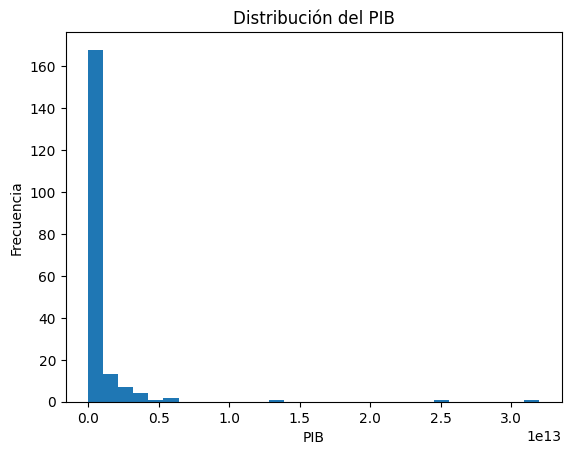

In [28]:
import matplotlib.pyplot as plt

plt.hist(y, bins=30)
plt.xlabel('PIB')
plt.ylabel('Frecuencia')
plt.title('Distribución del PIB')
plt.show()



## Etapa 2

## Reduccion de dimensionalidad

- La reduccion de dimensionalia consiste en reducir el numero de variables de una base de datos, pero tratando de mantener toda la informacion relevante. Esto se hace cuando hay muchos predictores como es el caso.


In [29]:
# Importar biliotecas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import statsmodels.api as sm
from scipy.stats import chi2

# Escalar datos
- Para aplicar PCA es necesario escalar los datos, para evitar que variables con valores grandes dominen el análisis.

In [30]:
scaler = StandardScaler()
x_std = scaler.fit_transform(x)
x_std = pd.DataFrame(x_std, columns=x.columns)

# Mapa de calor de correlacion

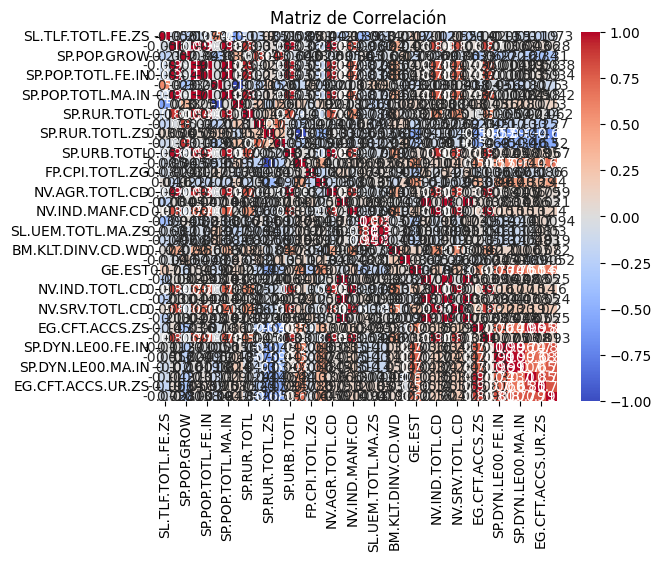

In [31]:
corr = x_std.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Matriz de Correlación")
plt.show()

# Aplicacion de PCA
- Permite reducir la dimensionalidad de un conjunto de datos y, al mismo tiempo, extraer las características más relevantes presentes en las variables numéricas originales.
- PCA se basa en la matriz de covarianzas (o de correlaciones, si utilizamos datos estandarizados).

In [32]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(x_std)

pca.explained_variance_ratio_

array([2.66298402e-01, 2.09393438e-01, 1.09297570e-01, 9.06184302e-02,
       7.55099481e-02, 4.58031587e-02, 3.49997983e-02, 3.05220156e-02,
       2.82114884e-02, 2.64965719e-02, 1.89798801e-02, 1.52236653e-02,
       1.28596355e-02, 1.15722494e-02, 6.50443327e-03, 4.78964766e-03,
       3.64093475e-03, 3.12690516e-03, 2.11892028e-03, 1.33220951e-03,
       8.44639754e-04, 5.99889989e-04, 5.10733572e-04, 2.21262176e-04,
       1.77434978e-04, 1.43633441e-04, 8.41823589e-05, 6.66459715e-05,
       2.67049157e-05, 1.56699328e-05, 4.35656891e-06, 2.33431939e-06,
       2.18902447e-06, 1.02020608e-06, 6.83731384e-31, 1.31901550e-33,
       1.31901550e-33, 1.29525128e-33])

In [33]:
#Calculo de cuantos componentes usar, quedandonos con un np > 0.80
np.sum([2.66298402e-01, 2.09393438e-01, 1.09297570e-01, 9.06184302e-02,
       7.55099481e-02, 4.58031587e-02, 3.49997983e-02])

np.float64(0.8319207452999999)

In [34]:
# Seleccionar 7 componentes
pca_7 = PCA(n_components=7)
data_pca = pca_7.fit_transform(x_std)

df_pca = pd.DataFrame(data_pca, columns=['CP1', 'CP2','CP3','CP4','CP5','CP6','CP7'])
df_pca.head()


,CP1,CP2,CP3,CP4,CP5,CP6,CP7
0,-1.815089,-3.644380,-0.145694,-1.154715,-0.165492,0.471595,0.352596
1,-1.834548,-3.762430,-0.230295,0.854099,-0.343465,1.033292,0.003467
2,-1.231055,-1.263561,0.043136,-0.082035,0.650257,0.600512,-1.164137
3,1.234612,0.331905,1.001307,0.279644,-2.165059,-0.347488,1.792756
4,-1.645341,-2.729969,-0.235013,0.889173,-0.793582,0.007776,0.717191


In [35]:
# Matriz de correlación de las componentes
df_pca.corr()

,CP1,CP2,CP3,CP4,CP5,CP6,CP7
CP1,1.000000e+00,-2.094593e-16,8.787506e-17,9.052360e-17,3.221633e-16,-1.090234e-16,-1.461175e-16
CP2,-2.094593e-16,1.000000e+00,-3.940543e-16,3.882038e-16,3.623724e-16,8.799238e-17,3.309393e-17
CP3,8.787506e-17,-3.940543e-16,1.000000e+00,-5.592675e-16,-4.327014e-16,9.843521e-17,4.342050e-17
CP4,9.052360e-17,3.882038e-16,-5.592675e-16,1.000000e+00,8.134220e-17,1.383383e-16,-2.365964e-16
CP5,3.221633e-16,3.623724e-16,-4.327014e-16,8.134220e-17,1.000000e+00,-6.543637e-16,1.641809e-16
CP6,-1.090234e-16,8.799238e-17,9.843521e-17,1.383383e-16,-6.543637e-16,1.000000e+00,1.879538e-16
CP7,-1.461175e-16,3.309393e-17,4.342050e-17,-2.365964e-16,1.641809e-16,1.879538e-16,1.000000e+00


In [36]:
# Loadings (interpretación de componentes)
loadings = pd.DataFrame(
    pca_7.components_.T,
    columns=['CP1', 'CP2','CP3','CP4','CP5','CP6','CP7'],
    index=x.columns
)
loadings

,CP1,CP2,CP3,CP4,CP5,CP6,CP7
SL.TLF.TOTL.FE.ZS,-0.020468,-0.016600,-0.184051,-0.179020,-0.305858,0.346094,0.082296
SL.TLF.TOTL.IN,0.293208,-0.112591,-0.005977,-0.008403,0.017360,-0.044883,0.057457
SP.POP.GROW,-0.049804,-0.113467,0.035620,0.372532,0.200082,0.288565,0.195730
SP.POP.TOTL,0.281836,-0.118319,0.005398,-0.004850,0.022888,-0.088982,0.106330
SP.POP.TOTL.FE.IN,0.282358,-0.118434,0.005209,-0.006486,0.021234,-0.086434,0.103936
SP.POP.TOTL.FE.ZS,-0.020679,-0.040416,-0.051646,-0.387883,-0.214645,0.309327,0.215400
SP.POP.TOTL.MA.IN,0.281288,-0.118189,0.005578,-0.003288,0.024463,-0.091398,0.108596
SP.POP.TOTL.MA.ZS,0.020679,0.040416,0.051646,0.387883,0.214645,-0.309327,-0.215400
SP.RUR.TOTL,0.233297,-0.127049,0.002548,0.008392,0.022735,-0.179703,0.222594
SP.RUR.TOTL.ZG,-0.039153,-0.107168,0.018193,0.314801,0.159548,0.251645,0.350042


## Etapa 3: Modelación mediante algoritmos de clasificación
- Vamos a realizar un total de 4 modelos, 2 con los datos raw (originales) y 2 con los datos ya transformados por PCA


In [52]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, StratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score, ConfusionMatrixDisplay, cohen_kappa_score
from IPython import display
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from pydotplus import graph_from_dot_data
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsRegressor

In [119]:
#@title Función para generar métricas
def fn_metricas_clasificacion(y_true, y_pred):
  print('Accuracy     : %.3f' % accuracy_score(y_true, y_pred))
  print("Precisión    : {}".format(precision_score(y_true, y_pred, average='weighted')))
  print("Recall       : {}".format(recall_score(y_true, y_pred, average=None)))
  print("Puntuación F1: {}".format(f1_score(y_true, y_pred, average=None)))
  print("Cohen Kappa  : {}".format(cohen_kappa_score(y_true, y_pred)))

In [64]:
#@title Crear función para visualizar métricas
def fn_metricas_info(modelo, y_verdadero, y_calculado):
    metrics = {
        'Accuracy': "%.5f" % accuracy_score(y_verdadero, y_calculado),
        'Precisión': "{}".format(precision_score(y_verdadero, y_calculado, average=None)),
        'Recall': "{}".format(recall_score(y_verdadero, y_calculado, average=None)),
        'Puntuación F1': "{}".format(f1_score(y_verdadero, y_calculado, average=None)),
        'Cohen Kappa': "{}".format(cohen_kappa_score(y_verdadero, y_calculado))
    }
    return pd.DataFrame(metrics, index=[modelo])

## Particionar set de datos

# datos sin PCA

In [115]:
y_categorized

,NY.GDP.MKTP.PP.KD
0,mediano
1,mediano
2,bajo
3,muy alto
4,muy bajo
...,...
193,alto
194,muy bajo
195,muy alto
196,bajo


In [107]:
X_train, X_test, y_train, y_test =train_test_split(x, y_categorized, test_size=0.2, random_state=0, stratify=y_categorized)

In [108]:
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.fit_transform(X_test)

In [109]:
# Importar biblioteca
from sklearn.ensemble import RandomForestClassifier

In [110]:
#knn
knn = KNeighborsClassifier(n_neighbors=5)
#aplicar modelo a datos de entrenamiento
knn_classifier = knn.fit(X_train_std, y_train)
#
kfold = StratifiedKFold(n_splits=5, shuffle = True, random_state=2025)
#
y_pred_knn = knn_classifier.predict(X_test_std)

In [111]:
cv = cross_val_score(knn,X_train_std, y_train, cv = kfold, scoring = 'accuracy')

In [112]:
print(f"Media Accuray: {cv.mean()}")

Media Accuray: 0.3227822580645161


In [113]:
print(f"Std Accuray: {cv.std()}")

Std Accuray: 0.04114286611117207


In [120]:
#@title Mostrar métricas
fn_metricas_clasificacion(y_test, y_pred_knn)

Accuracy     : 0.375
Precisión    : 0.4314285714285714
Recall       : [0.375 0.375 0.25  0.5   0.375]
Puntuación F1: [0.3        0.33333333 0.26666667 0.53333333 0.5       ]
Cohen Kappa  : 0.21875


In [117]:
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

        alto       0.25      0.38      0.30         8
        bajo       0.30      0.38      0.33         8
     mediano       0.29      0.25      0.27         8
    muy alto       0.57      0.50      0.53         8
    muy bajo       0.75      0.38      0.50         8

    accuracy                           0.38        40
   macro avg       0.43      0.38      0.39        40
weighted avg       0.43      0.38      0.39        40



In [130]:
#@title Ajustes de Hiperparámetros
# Generar las particiones
particiones = KFold(n_splits=5, shuffle=True, random_state=0)
# Generar diccionario con los hiperparámetros a aplicar
param_grid = {'n_neighbors': list(range(4,15)),
              'weights': ['uniform', 'distance'],
              'p': [1, 2]} # p=1 distancia de Manhattan; p=2 distancia euclidiana.
# Instanciar el modelo sin hiperparámetros
knn = KNeighborsClassifier()
# Aplicar GridSearchCV  usando el diccionario de hiperparámetros
mejor_modelo_knn = GridSearchCV(knn, param_grid = param_grid, scoring='accuracy', cv = particiones)
# Entrenar el modelo con datos train
mejor_modelo_knn.fit(X_train_std, y_train)
# Obtener los mejores parámetros
mejor_modelo_knn.best_params_

{'n_neighbors': 9, 'p': 1, 'weights': 'distance'}

In [131]:
#@title Obtener el mejor modelo
modelo_final = mejor_modelo_knn.best_estimator_
# Obtener predicciones con el set de test
y_pred_best = modelo_final.predict(X_test_std)
# Imprimir reporte de clasificación
print(classification_report(y_test, y_pred_best))

              precision    recall  f1-score   support

        alto       0.20      0.25      0.22         8
        bajo       0.30      0.38      0.33         8
     mediano       0.25      0.25      0.25         8
    muy alto       0.83      0.62      0.71         8
    muy bajo       0.83      0.62      0.71         8

    accuracy                           0.42        40
   macro avg       0.48      0.42      0.45        40
weighted avg       0.48      0.42      0.45        40



In [150]:
#@title Almacenar resultados del modelo
df_resultados = fn_metricas_info('knn-5', y_test, y_pred_knn)
df_resultados = pd.concat([df_resultados,fn_metricas_info('knn-13', y_test, y_pred_best)], axis=0)

df_resultados

,Accuracy,Precisión,Recall,Puntuación F1,Cohen Kappa
knn-5,0.37500,[0.25 0.3 0.28571429 0.57142857 0...,[0.375 0.375 0.25 0.5 0.375],[0.3 0.33333333 0.26666667 0.53333333 0...,0.21875
knn-13,0.42500,[0.2 0.3 0.25 0.83333333 0...,[0.25 0.375 0.25 0.625 0.625],[0.22222222 0.33333333 0.25 0.71428571 0...,0.28125


In [151]:
df_resultados = fn_metricas_info('knn-13', y_test, y_pred_best)
df_resultados

,Accuracy,Precisión,Recall,Puntuación F1,Cohen Kappa
knn-13,0.42500,[0.2 0.3 0.25 0.83333333 0...,[0.25 0.375 0.25 0.625 0.625],[0.22222222 0.33333333 0.25 0.71428571 0...,0.28125


In [132]:
#@title Instanciar algoritmo de clasificación RFC
rfc_clf = RandomForestClassifier()
# Aplicar modelo a datos de entrenamiento
classifier = rfc_clf.fit(X_train, y_train)

In [133]:
#@title Generar predicciones con datos test
y_pred_rfc = classifier.predict(X_test)

In [134]:
#@title Generar la matriz de confusión
confusion_matrix(y_test, y_pred_rfc)

array([[6, 0, 1, 1, 0],
       [0, 7, 1, 0, 0],
       [0, 4, 4, 0, 0],
       [0, 0, 0, 8, 0],
       [0, 0, 0, 0, 8]])

ValueError: The number of FixedLocator locations (5), usually from a call to set_ticks, does not match the number of labels (2).

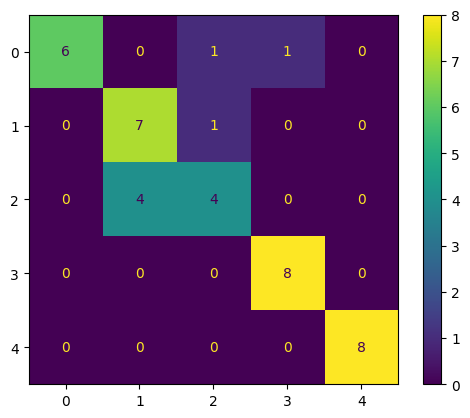

In [135]:
#@title Generar matriz de confusión
cm = confusion_matrix(y_true=y_test, y_pred=y_pred_rfc)
cm_display = ConfusionMatrixDisplay(cm, display_labels=[0,1]).plot()

In [138]:
#@title Mostrar métricas
fn_metricas_clasificacion(y_test, y_pred_rfc)

Accuracy     : 0.825
Precisión    : 0.8383838383838385
Recall       : [0.75  0.875 0.5   1.    1.   ]
Puntuación F1: [0.85714286 0.73684211 0.57142857 0.94117647 1.        ]
Cohen Kappa  : 0.78125


In [139]:
#@title Mostrar Reporte
print(classification_report(y_test, y_pred_rfc))

              precision    recall  f1-score   support

        alto       1.00      0.75      0.86         8
        bajo       0.64      0.88      0.74         8
     mediano       0.67      0.50      0.57         8
    muy alto       0.89      1.00      0.94         8
    muy bajo       1.00      1.00      1.00         8

    accuracy                           0.82        40
   macro avg       0.84      0.82      0.82        40
weighted avg       0.84      0.82      0.82        40



In [146]:
#@title Ajustes de Hiperparámetros
from sklearn.model_selection import GridSearchCV

# Generar las particiones
particiones = KFold(n_splits=10, shuffle=True, random_state=0)

# Definir los hiperparámetros y sus posibles valores
param_grid = {
    'n_estimators': [10,25,50],
    'max_depth' : [5,10,15],
    'criterion' : ['gini', 'entropy', 'log_loss'],
    'min_samples_split': [16,20,30],
    'min_samples_leaf': [8,10,12],
}

# Instanciar el modelo sin hiperparámetros
rf_clf = RandomForestClassifier(class_weight='balanced')

# Aplicar GridSearchCV  usando el diccionario de hiperparámetros
mejor_modelo_rfc = GridSearchCV(estimator=rf_clf, param_grid=param_grid, cv=particiones, scoring='accuracy')

# Entrenar el modelo con datos train
mejor_modelo_rfc.fit(X_train, y_train)

# Obtener los mejores parámetros
mejor_modelo_rfc.best_params_

{'criterion': 'entropy',
 'max_depth': 5,
 'min_samples_leaf': 10,
 'min_samples_split': 20,
 'n_estimators': 25}

In [147]:
#@title Obtener el mejor modelo
modelo_final = mejor_modelo_rfc.best_estimator_
# Obtener predicciones con el set de test
y_pred = modelo_final.predict(X_test)
# Imprimir reporte de clasificación
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        alto       1.00      0.75      0.86         8
        bajo       0.58      0.88      0.70         8
     mediano       0.50      0.38      0.43         8
    muy alto       1.00      1.00      1.00         8
    muy bajo       1.00      1.00      1.00         8

    accuracy                           0.80        40
   macro avg       0.82      0.80      0.80        40
weighted avg       0.82      0.80      0.80        40



In [148]:
#@title Métricas del modelo
metrica = fn_metricas_info('random_forest', y_test, y_pred)
metrica

,Accuracy,Precisión,Recall,Puntuación F1,Cohen Kappa
random_forest,0.80000,[1. 0.58333333 0.5 1. 1...,[0.75 0.875 0.375 1. 1. ],[0.85714286 0.7 0.42857143 1. 1...,0.75


In [152]:
#@title Almacenar resultados del modelo
df_resultados = pd.concat([df_resultados, metrica,])
df_resultados

,Accuracy,Precisión,Recall,Puntuación F1,Cohen Kappa
knn-13,0.42500,[0.2 0.3 0.25 0.83333333 0...,[0.25 0.375 0.25 0.625 0.625],[0.22222222 0.33333333 0.25 0.71428571 0...,0.28125
random_forest,0.80000,[1. 0.58333333 0.5 1. 1...,[0.75 0.875 0.375 1. 1. ],[0.85714286 0.7 0.42857143 1. 1...,0.75


## con datos del PCA